In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

from epf.util import load_and_concat_data, predict_with_timestamps
from epf.config import PROCESSED_DATA_DIR, FeatureConfig
from notebooks.delete_when_finished import seasonal_component

2025-05-16 10:57:10.937 | INFO     | epf.config:<module>:19 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-16 10:57:10.937 | INFO     | epf.config:create_dir:15 - DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data
2025-05-16 10:57:10.938 | INFO     | epf.config:create_dir:15 - RAW_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/raw
2025-05-16 10:57:10.938 | INFO     | epf.config:create_dir:15 - INTERIM_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/interim
2025-05-16 10:57:10.939 | INFO     | epf.config:create_dir:15 - PROCESSED_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed
2025-05-16 10:57:10.939 | INFO     | epf.config:create_dir:15 - TRAIN_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed/train_data
2025-05-16 10:57:10.940 | INFO     | epf.config:create_dir:15 - MODELS_DIR path is: C:/Users/valen/PycharmProjects/epf/models
2025-05-16 10:57:10.940 | INFO     | epf.config:create_dir:15 - PREDICTIONS_D

In [33]:
file_paths = {'de_prices': ['de_prices_2020.csv', 'de_prices_2021.csv', 'de_prices_2022.csv', 'de_prices_2023.csv', 'de_prices_2024.csv']}

COLORS = {
    "blue": "#3a609c",
    "blue_grey": "#69a0cb",
    "light_blue": "#afe1f5",
    "dark_green": "#345c0e",
    "olive": "#74953d",
    "green": "#c0d159",
    "gold": "#ffd700",
    "orange": "#ffb14e",
    "light_orange": "#fa8775",
    "magenta": "#840853",
    "purple": "#ba55aa",
    "light_purple": "#d1a7ef"
}

# avg Weekly volatility de lu prices

In [ ]:
tmp = []

for file_path in file_paths.values():
    col_name = [k for k, v in file_paths.items() if v == file_path]
    data = load_and_concat_data(file_path, col_name[0])
    tmp.append(data)

df = pd.concat(tmp, axis=1)

In [ ]:
df['volatility'] = df['de_prices'].rolling(window=24).std()
df['year'] = df.index.year
df['day'] = [x.strftime('%j') for x in df.index]
df['week'] = [x.strftime('%W') for x in df.index]

In [ ]:
df['mean_price'] = df['de_prices'].rolling(window=24*7).mean()
df['std_dev'] = df['de_prices'].rolling(window=24*7).std()

df['upper_band'] = df['mean_price'] + df['std_dev']
df['lower_band'] = df['mean_price'] - df['std_dev']

sns.set_style('ticks')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['mean_price'], color=COLORS['magenta'], label='Mean Price')
plt.fill_between(df.index, df['lower_band'], df['upper_band'], color=COLORS['purple'], alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Price in €/MWh')
plt.legend(loc='upper left')

#plt.title('Average weekly volatility of Prices in DE_LU bidding zone')

#plt.savefig("../reports/figures/volatility.pdf", dpi=300, bbox_inches='tight')

# Normed features

In [3]:
path = PROCESSED_DATA_DIR / "features.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)

In [10]:
df_std

,de_gas_gen_rm_seasonal,de_hard_coal_gen_rm_seasonal,de_lignite_gen_rm_seasonal,de_solar_gen_rm_seasonal,de_wind_gen_offshore_rm_seasonal,de_wind_gen_onshore_rm_seasonal,de_load_rm_seasonal,ch_prices_hat_rm_seasonal,de_prices_hat_rm_seasonal,dk1_prices_hat_rm_seasonal,dk2_prices_hat_rm_seasonal,fr_prices_hat_rm_seasonal
timestamp,,,,,,,,,,,,
2022-12-31 23:00:00+00:00,2398.962574,4346.000552,7149.331330,1560.567219,3148.009145,25260.698843,49594.451017,31.060762,59.237365,69.625022,79.878606,64.683394
2023-01-01 00:00:00+00:00,2430.104250,4415.371981,7080.911332,1547.539673,3591.873149,25306.120266,50014.050326,33.219155,64.515174,72.975606,82.494844,71.772860
2023-01-01 01:00:00+00:00,2416.035478,4498.871968,7078.608616,1535.775695,4010.209664,25304.884310,50142.277158,39.263156,66.723422,74.062323,84.075513,73.964489
2023-01-01 02:00:00+00:00,2382.670094,4540.044861,7129.434030,1523.803477,3972.811395,25285.956764,49946.634612,43.120039,68.004958,77.369882,86.659602,78.940550
2023-01-01 03:00:00+00:00,2411.335748,4580.350475,7221.594894,1513.976113,3918.557942,25102.525001,49486.383369,53.405810,69.209481,77.768006,88.779323,80.030259
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 18:00:00+00:00,7539.317886,3420.089977,6166.039235,1950.192657,2299.244370,27693.633796,49817.303171,119.638457,64.607452,36.456318,32.853733,83.253990
2024-12-31 19:00:00+00:00,6988.208465,3460.616383,5909.408505,1950.508512,2104.382148,28256.435057,49814.889987,119.704207,58.221412,32.833589,32.752820,84.644232
2024-12-31 20:00:00+00:00,6880.665726,3484.750453,5128.262152,1953.608869,2212.570301,28690.310273,49803.040443,121.277820,56.674892,33.482019,33.426614,86.399321


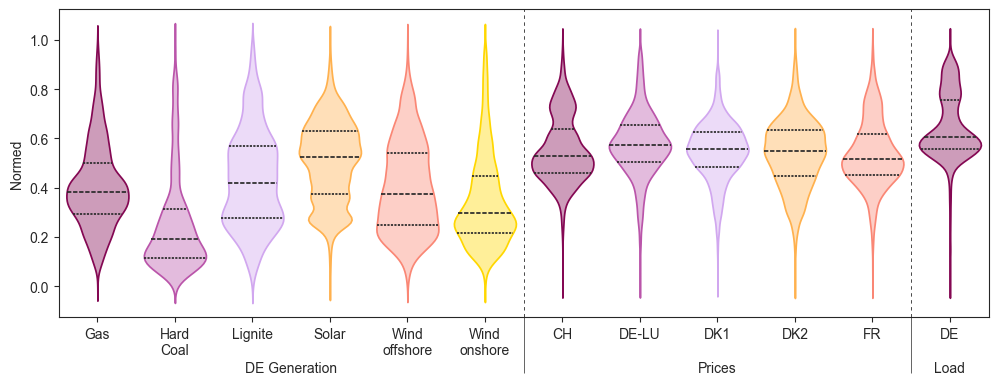

In [19]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../models/lstm_all_features.pkl", "rb") as f:
    model_obj = pkl.load(f)

train_df = model_obj['train_df']
fs = pd.read_csv("../data/processed/features.csv", index_col=0, parse_dates=True)

feature_set = fs[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'de_load_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal']]
train_df = train_df[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal', 'de_load_rm_seasonal']]

palette = {
    # first palette
    'de_gas_gen_rm_seasonal': COLORS['magenta'],
    'de_hard_coal_gen_rm_seasonal': COLORS['purple'],
    'de_lignite_gen_rm_seasonal': COLORS['light_purple'],
    'de_solar_gen_rm_seasonal': COLORS['orange'],
    'de_wind_gen_offshore_rm_seasonal': COLORS['light_orange'],
    'de_wind_gen_onshore_rm_seasonal': COLORS['gold'],

    # second palette
    'ch_prices_hat_rm_seasonal': COLORS['magenta'],
    'de_prices_hat_rm_seasonal': COLORS['purple'],
    'dk1_prices_hat_rm_seasonal': COLORS['light_purple'],
    'dk2_prices_hat_rm_seasonal': COLORS['orange'],
    'fr_prices_hat_rm_seasonal': COLORS['light_orange'],

    # third palette
    'de_load_rm_seasonal': COLORS['magenta'],
}

labels = {
    #first labels
    'de_solar_gen_rm_seasonal': 'Solar',
    'de_wind_gen_onshore_rm_seasonal': 'Wind\nonshore',
    'de_wind_gen_offshore_rm_seasonal': 'Wind\noffshore',
    'de_hard_coal_gen_rm_seasonal': 'Hard\nCoal',
    'de_lignite_gen_rm_seasonal': 'Lignite',
    'de_gas_gen_rm_seasonal': 'Gas',

    # second labels
    'de_prices_hat_rm_seasonal': 'DE-LU',
    'ch_prices_hat_rm_seasonal': 'CH',
    'dk1_prices_hat_rm_seasonal': 'DK1',
    'dk2_prices_hat_rm_seasonal': 'DK2',
    'fr_prices_hat_rm_seasonal': 'FR',

    # third labels
    'de_load_rm_seasonal': 'DE',
}

train_min = train_df.min()
train_max = train_df.max()

keys = feature_set.keys()

sns.set_style("ticks")

df_std = (feature_set - train_min) / (train_max - train_min)
plt.figure(figsize=(12, 4))

ax = sns.violinplot(data=train_df, inner="quart", palette=palette, saturation=1)
for violin, color in zip(ax.collections[::1], palette.values()):
    facecolor = plt.matplotlib.colors.to_rgba(color, alpha=0.4)
    violin.set_facecolor(facecolor)
    violin.set_edgecolor(color)
#ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xticks(range(len(train_df.columns)))
ax.set_xticklabels([labels[col] for col in train_df.columns])
ax.set_ylabel('Normed')
ax.axvline(x = 5.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)
ax.axvline(x = 10.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)

sec = ax.secondary_xaxis(location=0)
sec.set_xticks(ticks=[2.5, 8, 11], labels=['\nDE Generation', '\nPrices', '\nLoad'])
sec.tick_params('x', length=0, pad=20)
sec.spines["bottom"].set_visible(False)

sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(ticks=[5.5, 10.5], labels=[])
sec2.tick_params('x', length=40, width=0.5)
sec2.spines["bottom"].set_visible(False)

plt.savefig("../reports/figures/normed_feature_distribution.pdf", dpi=300, bbox_inches='tight')

plt.show()

# Metrics

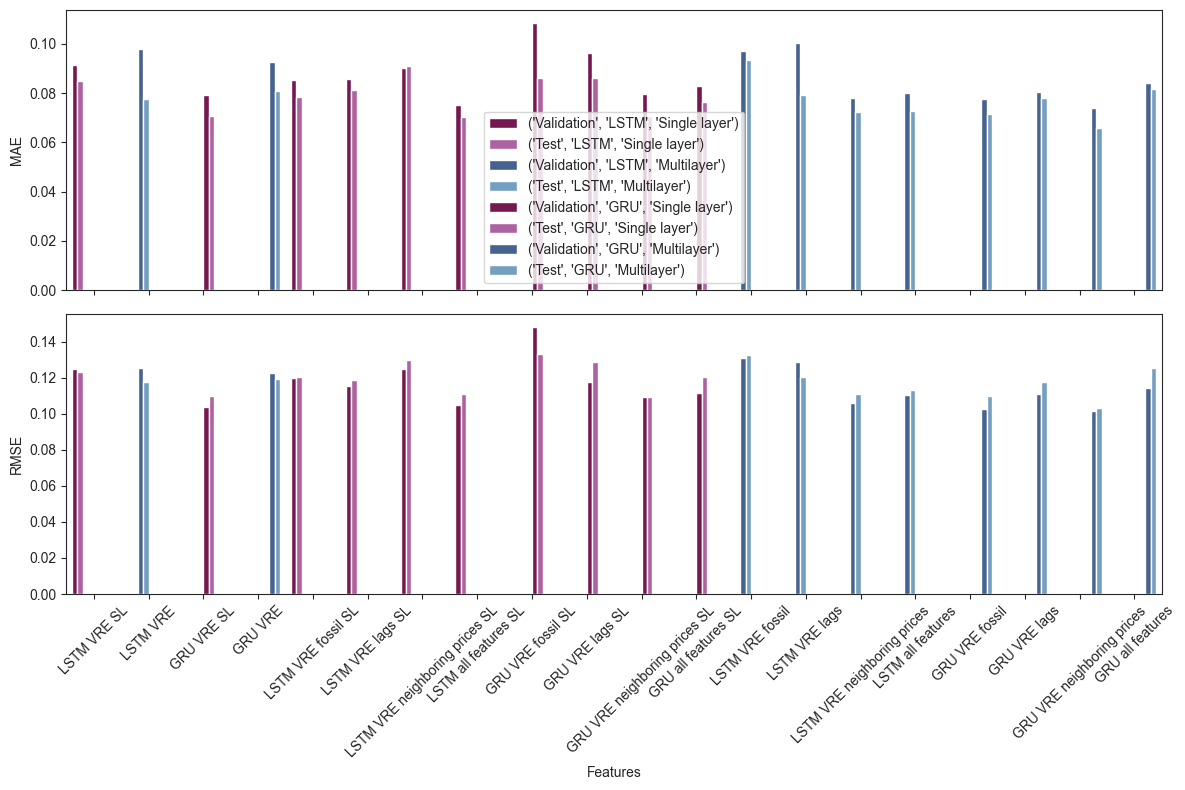

In [55]:
import pickle as pkl
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

with open("../data/processed/performance.pkl", "rb") as f:
    performance = pkl.load(f)

with open("../data/processed/val_performance.pkl", "rb") as f:
    val_performance = pkl.load(f)

models = {
    # VRE
    'lstm_vre_sl': 'LSTM VRE SL',
    'lstm_vre': 'LSTM VRE',
    'gru_vre_sl': 'GRU VRE SL',
    'gru_vre': 'GRU VRE',

    # explanatory variables sl
    'lstm_vre_fossil_sl': 'LSTM VRE fossil SL',
    'lstm_vre_lags_sl': 'LSTM VRE lags SL',
    'lstm_vre_neighboring_prices_sl': 'LSTM VRE neighboring prices SL',
    'lstm_all_features_sl': 'LSTM all features SL',

    'gru_vre_fossil_sl': 'GRU VRE fossil SL',
    'gru_vre_lags_sl': 'GRU VRE lags SL',
    'gru_vre_neighboring_prices_sl': 'GRU VRE neighboring prices SL',
    'gru_all_features_sl': 'GRU all features SL',

    # explanatory variables ml
    'lstm_vre_fossil': 'LSTM VRE fossil',
    'lstm_vre_lags': 'LSTM VRE lags',
    'lstm_vre_neighboring_prices': 'LSTM VRE neighboring prices',
    'lstm_all_features': 'LSTM all features',

    'gru_vre_fossil': 'GRU VRE fossil',
    'gru_vre_lags': 'GRU VRE lags',
    'gru_vre_neighboring_prices': 'GRU VRE neighboring prices',
    'gru_all_features': 'GRU all features',
}

palette = {
    ('Validation', 'LSTM', 'Single layer'): COLORS['magenta'],
    ('Test', 'LSTM', 'Single layer'): COLORS['purple'],

    ('Validation', 'LSTM', 'Multilayer'): COLORS['blue'],
    ('Test', 'LSTM', 'Multilayer'): COLORS['blue_grey'],

    ('Validation', 'GRU', 'Single layer'): COLORS['magenta'],
    ('Test', 'GRU', 'Single layer'): COLORS['purple'],

    ('Validation', 'GRU', 'Multilayer'): COLORS['blue'],
    ('Test', 'GRU', 'Multilayer'): COLORS['blue_grey'],
}

metrics = {'mean_absolute_error':'MAE', 'root_mean_squared_error':'RMSE'}

data = []
for model_key, model_name in models.items():
    for metric, name in metrics.items():
        data.append({
            'Model': model_name,
            'Metric': name,
            'Dataset': 'Validation',
            'Value': val_performance[model_key][metric],
            'Layer': 'LSTM' if 'lstm' in model_key else 'GRU',
            'Architecture': 'Single layer' if model_key.endswith('_sl') else 'Multilayer'
        })
        data.append({
            'Model': model_name,
            'Metric': name,
            'Dataset': 'Test',
            'Value': performance[model_key][metric],
            'Layer': 'LSTM' if 'lstm' in model_key else 'GRU',
            'Architecture': 'Single layer' if model_key.endswith('_sl') else 'Multilayer'
        })

df = pd.DataFrame(data)

sns.set_style('ticks')
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)), sharex=True)

for i, (metric_key, metric_name) in enumerate(metrics.items()):
    sns.barplot(
        data=df[df['Metric'] == metric_name],
        x='Model',
        y='Value',
        hue=df[['Dataset', 'Layer', 'Architecture']].apply(tuple, axis=1),
        palette=palette,
        ax=axes[i],
        dodge=True
    )
    axes[i].set_ylabel(metric_name)
    axes[i].set_xlabel('Features')
    plt.xticks(rotation=45)

    if i == 0:
        axes[i].legend()
    else:
        axes[i].legend().remove()

plt.tight_layout()
plt.show()

In [63]:
rounded_errors = {}

for model_key, metrics in performance.items():
    rounded_errors[model_key] = {metric: round(value, 4) for metric, value in metrics.items()}

print(rounded_errors)

{'gru_vre': {'loss': 0.0808, 'mean_absolute_error': 0.0808, 'root_mean_squared_error': 0.1196}, 'lstm_vre': {'loss': 0.0774, 'mean_absolute_error': 0.0774, 'root_mean_squared_error': 0.1177}, 'lstm_vre_fossil': {'loss': 0.0935, 'mean_absolute_error': 0.0935, 'root_mean_squared_error': 0.1327}, 'gru_vre_fossil': {'loss': 0.0715, 'mean_absolute_error': 0.0715, 'root_mean_squared_error': 0.1097}, 'gru_vre_lags': {'loss': 0.0779, 'mean_absolute_error': 0.0779, 'root_mean_squared_error': 0.1174}, 'lstm_vre_lags': {'loss': 0.0792, 'mean_absolute_error': 0.0792, 'root_mean_squared_error': 0.1204}, 'lstm_vre_lags_sl': {'loss': 0.0814, 'mean_absolute_error': 0.0814, 'root_mean_squared_error': 0.119}, 'gru_vre_lags_sl': {'loss': 0.0861, 'mean_absolute_error': 0.0861, 'root_mean_squared_error': 0.129}, 'gru_vre_sl': {'loss': 0.0707, 'mean_absolute_error': 0.0707, 'root_mean_squared_error': 0.1101}, 'lstm_all_features': {'loss': 0.0728, 'mean_absolute_error': 0.0728, 'root_mean_squared_error': 0.1

### naive forecast

In [159]:
import pickle as pkl
import pandas as pd

with open("../models/lstm_vre.pkl", "rb") as f:
    model_obj = pkl.load(f)

train_df = model_obj['train_df']
validation_df = model_obj['validation_df']
test_df = model_obj['test_df']

data = pd.concat([train_df, validation_df, test_df], axis=0)

In [ ]:
# this is only for viusalization purposes, mae and rmse are calculated based on the data DataFrame one cell above

train_min = model_obj['train_min']
train_max = model_obj['train_max']
seasonal_component = model_obj['seasonal']

# denormalize the data
data_denorm = (data * (train_max - train_min)) + train_min

for col, mstl in seasonal_component.items():
    if col not in data_denorm.columns:
        continue
    original_col = col.replace('_rm_seasonal', '')
    data_denorm[original_col] = data_denorm[col] + sum(mstl.seasonal[f'seasonal_{p}'] for p in (24, 168))
    data_denorm.drop(columns=[col], inplace=True)

In [160]:
true = data['de_prices_hat_rm_seasonal']
naive = true.shift(24*7)  # shift by one week to get the naive forecast

naive_mae = (true - naive).abs().mean()
naive_rmse = ((true - naive) ** 2).mean() ** 0.5

In [141]:
print(f'Naive MAE: {naive_mae.round(4)}')
print(f'Naive RMSE: {naive_rmse.round(4)}')

Naive MAE: 0.1283
Naive RMSE: 0.1909


### absolute error over time

retrieve the predictions, maybe group them by day/week/month to see error at different points in time

In [34]:
import pandas as pd
import pickle as pkl
from epf.util import predict_with_timestamps
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

with open("../models/lstm_vre.pkl", "rb") as f:
    lstm_model_obj = pkl.load(f)

with open("../models/gru_vre.pkl", "rb") as f:
    gru_model_obj = pkl.load(f)

lstm_preds, lstm_trues = predict_with_timestamps(lstm_model_obj, label_columns=window.label_columns)
gru_preds, gru_trues = predict_with_timestamps(gru_model_obj, label_columns=window.label_columns)

In [35]:
lstm_preds.set_index('timestamp', inplace=True)
lstm_trues.set_index('timestamp', inplace=True)

gru_preds.set_index('timestamp', inplace=True)
gru_trues.set_index('timestamp', inplace=True)

In [189]:
# create a naive forecast by forecasting at each hour the price of the same hour from the previous week and flatten the naive predictions into one row of the dataframe making each row of the df a 24 hour forecast
y = data['de_prices_hat_rm_seasonal']

horizons = range(1, 25)
col_names = [f't+{h}' for h in horizons]

naive_hourly = pd.DataFrame(index=y.index, columns=col_names)
naive_hourly_true = pd.DataFrame(index=y.index, columns=col_names)

# fill the naive predictions with the prices of the same hour from the previous week, each forecast is a row in the dataframe
for h in horizons:
    shift_amount = 168 - h  # 168 hours = 1 week
    naive_hourly[f't+{h}'] = y.shift(shift_amount)
    naive_hourly_true[f't+{h}'] = y.shift(-h)

start = lstm_preds.index[0]
end = lstm_preds.index[-1]

# remove the timezone awarenss from the index
naive_hourly.index = naive_hourly.index.tz_localize(None)
naive_hourly_true.index = naive_hourly_true.index.tz_localize(None)

naive_hourly = naive_hourly.loc[start:end]
naive_hourly_true = naive_hourly_true.loc[start:end]

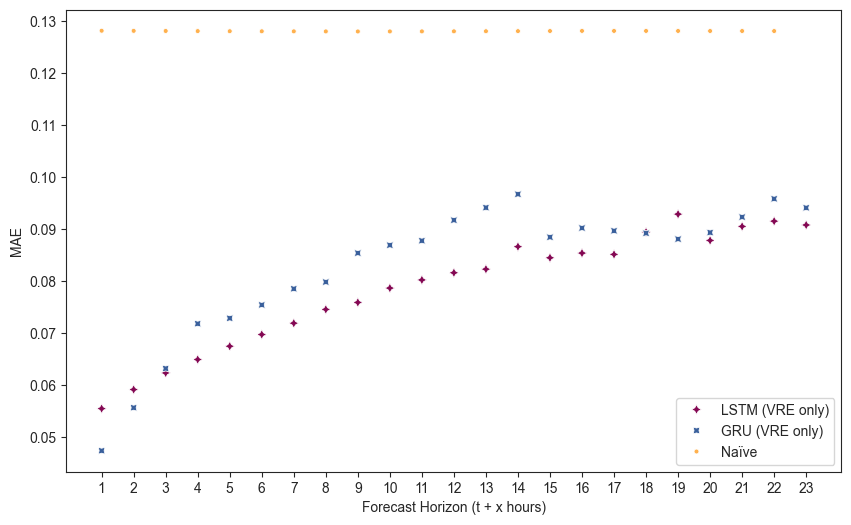

In [195]:
lstm_mae_per_horizon = np.mean(np.abs(lstm_trues.iloc[:, 1:].values - lstm_preds.iloc[:, 1:].values), axis=0)
gru_mae_per_horizon = np.mean(np.abs(gru_trues.iloc[:, 1:].values - gru_preds.iloc[:, 1:].values), axis=0)
naive_mae_per_horizon = np.mean(np.abs(naive_hourly_true.iloc[:, 1:].values - naive_hourly.iloc[:, 1:].values), axis=0)

data = pd.DataFrame({
    'LSTM (VRE only)': lstm_mae_per_horizon,
    'GRU (VRE only)': gru_mae_per_horizon,
    'Naïve': naive_mae_per_horizon})

palette = {
    'LSTM (VRE only)': COLORS['magenta'],
    'GRU (VRE only)': COLORS['blue'],
    'Naïve': COLORS['orange']
}

sns.set_style('ticks')

plt.figure(figsize=(10, 6))
sns.scatterplot(data, palette=palette, zorder=3, markers=[(4,1,0), (4,1,45), '.'], s=50)
plt.xlabel("Forecast Horizon (t + x hours)")
plt.ylabel("MAE")
#plt.title("MAE by Forecast Horizon")
plt.xticks(range(0, 23), range(1, 24))
plt.show()

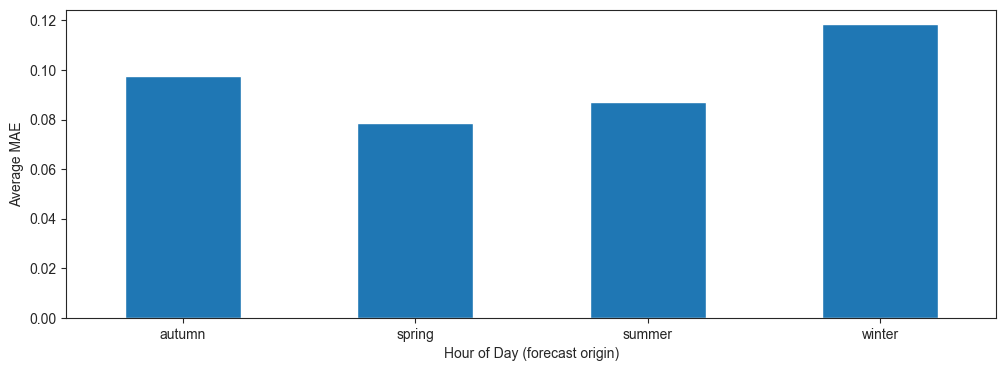

In [32]:
df_errors = df_preds.copy()
df_errors.iloc[:, 1:] = np.abs(df_preds.iloc[:, 1:] - df_trues.iloc[:, 1:])

hourly_mae = df_errors.groupby(df_errors.index.hour).mean().mean(axis=1)
weekly_mae = df_errors.groupby(df_errors.index.weekday).mean().mean(axis=1)

sns.set_style('ticks')

plt.figure(figsize=(12, 4))
hourly_mae.plot(kind="bar")
plt.xlabel("Hour of Day (forecast origin)")
plt.ylabel("Average MAE")
#plt.title("Forecast Error vs. Time of Day")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_errors['season'] = df_errors.index.map(lambda x: 'summer' if x.month in [6, 7, 8] else 'winter' if x.month in [12, 1, 2] else 'spring' if x.month in [3, 4, 5] else 'autumn')
df_errors['day_string'] = df_errors.index.strftime('%a')
seasonal_mae = df_errors.groupby('season').mean().mean(axis=1)

season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

month_colors = {
    'Winter': COLORS['orange'],
    'Spring': COLORS['light_orange'],
    'Summer': COLORS['magenta'],
    'Autumn': COLORS['purple'],
}

df_plot_monthly = df_errors[].groupby(['day_string', 'season']).mean().reset_index()
df_plot_monthly['day_string'] = pd.Categorical(df_plot_monthly['day_string'], categories=day_order, ordered=True)

sns.set_style("ticks")

plt.figure(figsize=(12, 4))
sns.lineplot(data = df_plot_monthly, x='day_string', y='de_prices', hue='season', hue_order=season_order, palette=month_colors, legend=True)
plt.legend(loc='lower left')
plt.xlabel("Day of the week")
plt.ylabel("Price in €/MWh")

weather based analysis

In [8]:
ghi = pd.read_csv("../data/raw/de_global_horizontal_irradiation_2024.csv", skiprows=6, parse_dates=True, index_col=1)
ws = pd.read_csv("../data/raw/de_wind_speed_100_2024.csv", skiprows=6, parse_dates=True, index_col=1)
ghi_avg = ghi.pivot(columns='location_id', values='shortwave_radiation (W/m²)').mean(axis=1).rename('ghi_avg')
ws_avg = ws.pivot(columns='location_id', values='wind_speed_100m (km/h)').mean(axis=1).rename('ws_avg')
weather_df = pd.concat([ghi_avg, ws_avg], axis=1)
weather_df

,ghi_avg,ws_avg
time,,
2024-01-01 00:00:00,0.0,32.92
2024-01-01 01:00:00,0.0,32.56
2024-01-01 02:00:00,0.0,33.56
2024-01-01 03:00:00,0.0,34.30
2024-01-01 04:00:00,0.0,34.62
...,...,...
2024-12-31 19:00:00,0.0,31.30
2024-12-31 20:00:00,0.0,31.54
2024-12-31 21:00:00,0.0,33.24


In [9]:
df_errors.columns = [col.split('_')[-1] for col in df_errors.columns]
data = df_errors.join(weather_df, how='inner')
data

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,...,t+21,t+22,t+23,t+24,hour,day,month,weekday,ghi_avg,ws_avg
2024-01-02 05:00:00,-2.131261,0.621685,0.630658,0.529465,0.559760,0.408221,0.012483,0.006412,0.458472,0.731675,...,1.706635,1.395152,1.453076,1.749728,5,2,1,2,0.0,33.66
2024-01-02 06:00:00,-2.328795,0.792028,0.669633,0.517789,0.494161,0.057558,0.576256,0.739368,1.297210,1.763046,...,2.127938,1.991308,2.355885,2.684212,6,2,1,2,0.0,32.92
2024-01-02 07:00:00,-2.607297,1.126868,1.148835,0.824676,0.793999,0.034013,1.026866,1.228525,2.064729,2.304101,...,1.878717,2.127406,2.611059,2.063241,7,2,1,2,0.0,33.92
2024-01-02 08:00:00,-2.251823,0.926942,0.995382,0.583359,0.477264,0.547688,1.586226,1.952989,2.704807,2.901565,...,2.169759,2.578449,2.229243,1.966971,8,2,1,2,2.4,35.38
2024-01-02 09:00:00,-2.150293,1.048663,1.075156,0.545358,0.304944,0.862801,2.116353,2.393741,3.242674,3.288362,...,2.448439,2.054535,2.019824,2.143526,9,2,1,2,14.6,35.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 19:00:00,0.440037,0.240436,0.250726,0.586754,0.983892,0.926995,0.839585,0.867950,0.905093,1.074180,...,1.564056,1.571700,1.572193,1.637247,19,30,12,1,0.0,22.06
2024-12-30 20:00:00,0.434082,0.219632,0.575112,0.928685,0.894613,0.777028,0.780980,0.805722,0.984009,1.244838,...,1.534354,1.538122,1.626594,1.800325,20,30,12,1,0.0,22.40
2024-12-30 21:00:00,0.422987,0.573505,0.953577,0.889416,0.800681,0.781568,0.773314,0.934431,1.199481,1.270876,...,1.508887,1.610821,1.801841,1.826097,21,30,12,1,0.0,22.78
2024-12-30 22:00:00,0.425252,0.949830,0.906974,0.782753,0.792048,0.767260,0.895494,1.143075,1.226038,1.403444,...,1.610716,1.819343,1.859371,1.774449,22,30,12,1,0.0,22.92


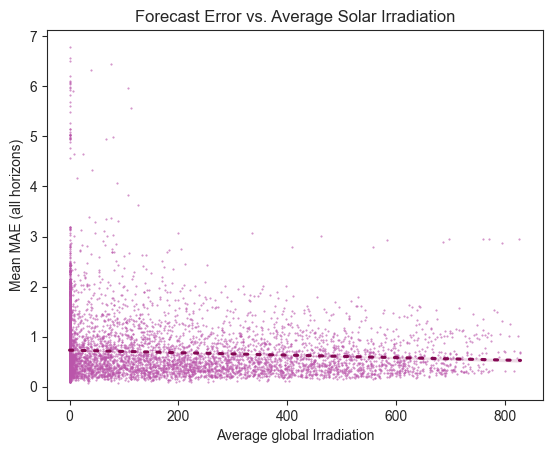

In [10]:
data["mean_mae"] = data.iloc[:, 1:24].mean(axis=1)

sns.set_style('ticks')

sns.regplot(data, x='ghi_avg', y='mean_mae', marker='.',
            scatter_kws={'color': COLORS['purple'], 'alpha': 0.7, 's': 1},
            line_kws={'color': COLORS['magenta'], 'dashes': [1,3], 'dash_capstyle': 'round'})
plt.xlabel("Average global Irradiation")
plt.ylabel("Mean MAE (all horizons)")
plt.title("Forecast Error vs. Average Solar Irradiation")
plt.show()

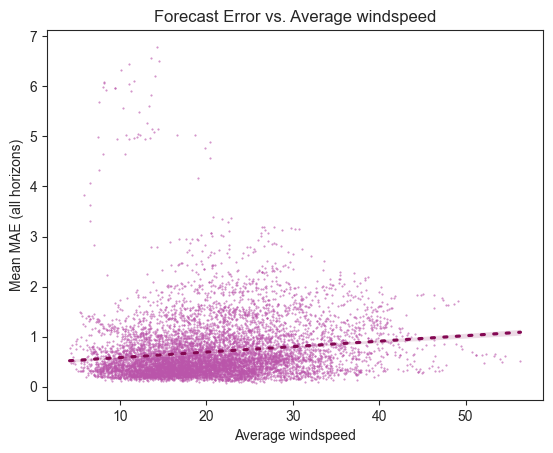

In [11]:
sns.regplot(data, x='ws_avg', y='mean_mae', marker='.',
            scatter_kws={'color': COLORS['purple'], 'alpha': 0.7, 's': 1},
            line_kws={'color': COLORS['magenta'], 'dashes': [1,3], 'dash_capstyle': 'round'})

sns.set_style('ticks')

plt.xlabel("Average windspeed")
plt.ylabel("Mean MAE (all horizons)")
plt.title("Forecast Error vs. Average windspeed")
plt.show()

### timings

In [106]:
import pickle as pkl
import json

models = {
    # VRE
    'lstm_vre_sl': 'LSTM VRE SL',
    'lstm_vre': 'LSTM VRE',
    'gru_vre_sl': 'GRU VRE SL',
    'gru_vre': 'GRU VRE',

    # explanatory variables sl
    'lstm_vre_fossil_sl': 'LSTM VRE fossil SL',
    'lstm_vre_lags_sl': 'LSTM VRE lags SL',
    'lstm_vre_neighboring_prices_sl': 'LSTM VRE neighboring prices SL',
    'lstm_all_features_sl': 'LSTM all features SL',

    'gru_vre_fossil_sl': 'GRU VRE fossil SL',
    'gru_vre_lags_sl': 'GRU VRE lags SL',
    'gru_vre_neighboring_prices_sl': 'GRU VRE neighboring prices SL',
    'gru_all_features_sl': 'GRU all features SL',

    # explanatory variables ml
    'lstm_vre_fossil': 'LSTM VRE fossil',
    'lstm_vre_lags': 'LSTM VRE lags',
    'lstm_vre_neighboring_prices': 'LSTM VRE neighboring prices',
    'lstm_all_features': 'LSTM all features',

    'gru_vre_fossil': 'GRU VRE fossil',
    'gru_vre_lags': 'GRU VRE lags',
    'gru_vre_neighboring_prices': 'GRU VRE neighboring prices',
    'gru_all_features': 'GRU all features',
}

for model_key, model_name in models.items():
    path = f"../models/{model_key}.pkl"
    with open(path, "rb") as f:
        models.update({model_key: pkl.load(f)})

timings = {}

for model_key, model_obj in models.items():
    timings.update({model_obj['model_name']: model_obj['timings']})

with open('../models/timings.json', 'w') as f:
    json.dump(timings, f)